<a href="https://colab.research.google.com/github/basawanayya/deep-learning/blob/master/RNN_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [0]:
x=[]
for i in range(100):
  x.append([[i+j] for j in range(5)])

In [0]:
x[:10]

[[[0], [1], [2], [3], [4]],
 [[1], [2], [3], [4], [5]],
 [[2], [3], [4], [5], [6]],
 [[3], [4], [5], [6], [7]],
 [[4], [5], [6], [7], [8]],
 [[5], [6], [7], [8], [9]],
 [[6], [7], [8], [9], [10]],
 [[7], [8], [9], [10], [11]],
 [[8], [9], [10], [11], [12]],
 [[9], [10], [11], [12], [13]]]

In [0]:
 y = []
 for i in range(100):
   y.append(i+5)

In [0]:
y[:10]

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [0]:
x, y = np.array(x), np.array(y)

In [0]:
x, y = x/100, y/100

In [0]:
x.shape, y.shape

((100, 5, 1), (100,))

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = .2, random_state = 1)

In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.LSTM(1, batch_input_shape = (None, 5, 1), return_sequences= True),
                                      tf.keras.layers.LSTM(5, return_sequences= True),
                                      tf.keras.layers.LSTM(5,  return_sequences= True),
                                      tf.keras.layers.LSTM(5,  return_sequences= True),
                                      tf.keras.layers.LSTM(1, return_sequences = False)
                                  

])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(loss = 'mse',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 1)              12        
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 5)              140       
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 5)              220       
_________________________________________________________________
lstm_3 (LSTM)                (None, 5, 5)              220       
_________________________________________________________________
lstm_4 (LSTM)                (None, 1)                 28        
Total params: 620
Trainable params: 620
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train, y_train, epochs=400, validation_data=(x_test, y_test))

Train on 80 samples, validate on 20 samples
Epoch 1/400
80/80 [==============================] - 0s 995us/sample - loss: 0.0826 - acc: 0.0125 - val_loss: 0.0654 - val_acc: 0.0000e+00
Epoch 2/400
80/80 [==============================] - 0s 810us/sample - loss: 0.0823 - acc: 0.0125 - val_loss: 0.0651 - val_acc: 0.0000e+00
Epoch 3/400
80/80 [==============================] - 0s 763us/sample - loss: 0.0821 - acc: 0.0125 - val_loss: 0.0649 - val_acc: 0.0000e+00
Epoch 4/400
80/80 [==============================] - 0s 768us/sample - loss: 0.0820 - acc: 0.0125 - val_loss: 0.0645 - val_acc: 0.0000e+00
Epoch 5/400
80/80 [==============================] - 0s 754us/sample - loss: 0.0817 - acc: 0.0125 - val_loss: 0.0643 - val_acc: 0.0000e+00
Epoch 6/400
80/80 [==============================] - 0s 807us/sample - loss: 0.0815 - acc: 0.0125 - val_loss: 0.0640 - val_acc: 0.0000e+00
Epoch 7/400
80/80 [==============================] - 0s 771us/sample - loss: 0.0813 - acc: 0.0125 - val_loss: 0.0637 - val

In [0]:
predictions = model.predict(x_test)

In [0]:
predictions[:]

array([[0.8552242 ],
       [0.8877737 ],
       [0.36559498],
       [0.863587  ],
       [0.95191216],
       [0.20604378],
       [0.39971474],
       [0.87180144],
       [0.7547141 ],
       [0.71521145],
       [0.94540846],
       [0.43423542],
       [0.6227692 ],
       [0.5801731 ],
       [0.5693538 ],
       [0.35438758],
       [0.34329   ],
       [0.49155733],
       [0.83806634],
       [0.15298216]], dtype=float32)

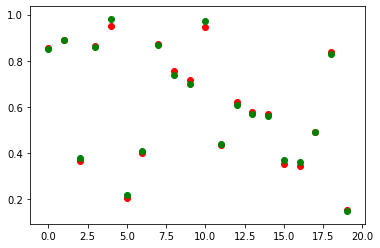

In [0]:
plt.scatter(range(len(y_test)), predictions, c='r')
plt.scatter(range(len(y_test)), y_test, c='g')
plt.show()